In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import andrews_curves
from skimage import io

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import catboost
import lightgbm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
data = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [ ]:
data.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [ ]:
data = data.drop('Id',axis=1)

In [ ]:
print("Duplicates",data.duplicated().any())
print(data.isnull().sum())

Duplicates True
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
fig = px.scatter_3d(data,x='SepalLengthCm',y='SepalWidthCm',z='PetalLengthCm',color='Species',size_max=18)
fig.show()

In [ ]:
fig = px.violin(data,x='Species', y='SepalLengthCm',box=True,points='all',hover_data=data.columns,color='Species')
fig.show()

In [ ]:
fig = px.violin(data,y='SepalLengthCm',points='all',hover_data=data.columns,color='Species',violinmode='overlay')
fig.show()

In [ ]:
fig = px.sunburst(data, path=['Species','SepalLengthCm','PetalLengthCm'])
fig.show()

In [ ]:
fig = px.density_contour(data, x="SepalLengthCm", y="Species")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x="SepalWidthCm",
                 y="SepalLengthCm",
                 color ='Species',
                 size='PetalLengthCm',
                 symbol='Species',
                 marginal_y="violin",
                 marginal_x="box")
fig.show()

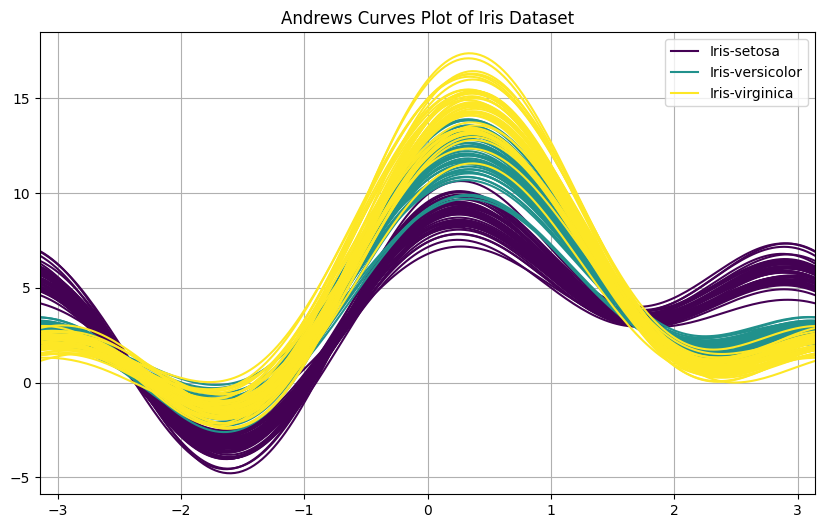

In [ ]:
plt.figure(figsize=(10,6))
andrews_curves(data, 'Species', colormap='viridis')
plt.title("Andrews Curves Plot of Iris Dataset")
plt.show()

<Axes: xlabel='Species', ylabel='count'>

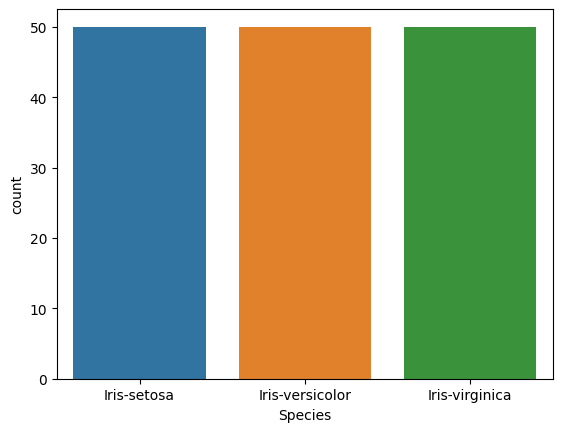

In [ ]:
sns.countplot(data,x='Species')

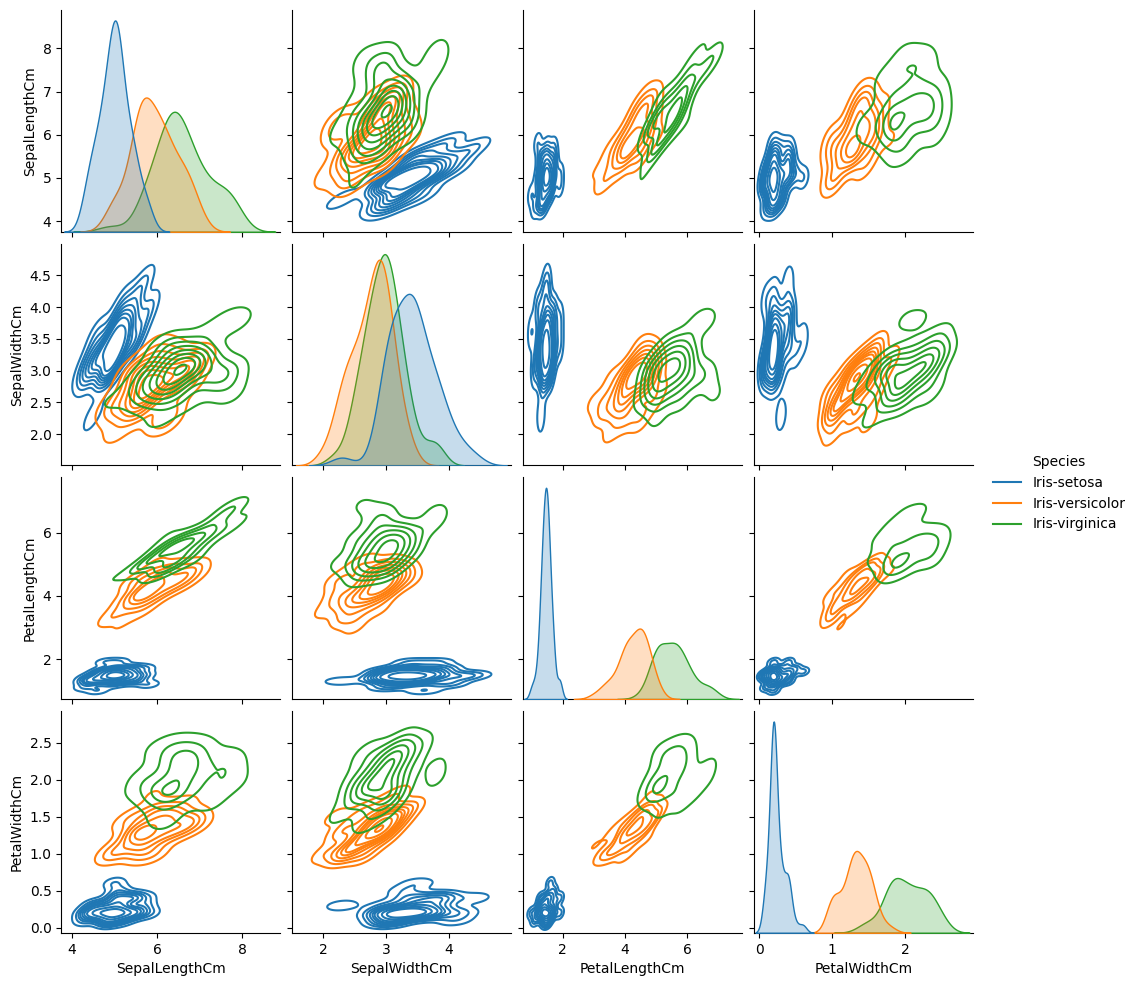

In [ ]:
sns.pairplot(data,hue='Species',kind='kde')

<Axes: ylabel='Proportion'>

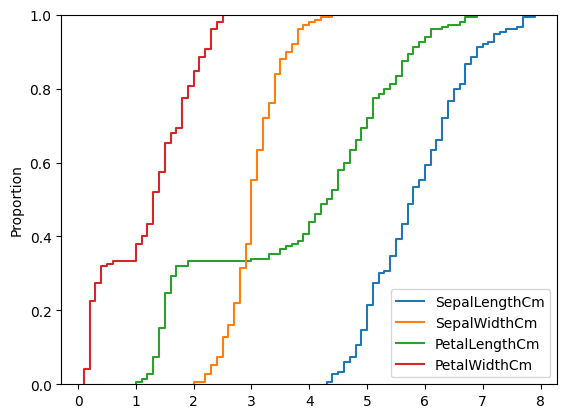

In [ ]:
sns.ecdfplot(data)

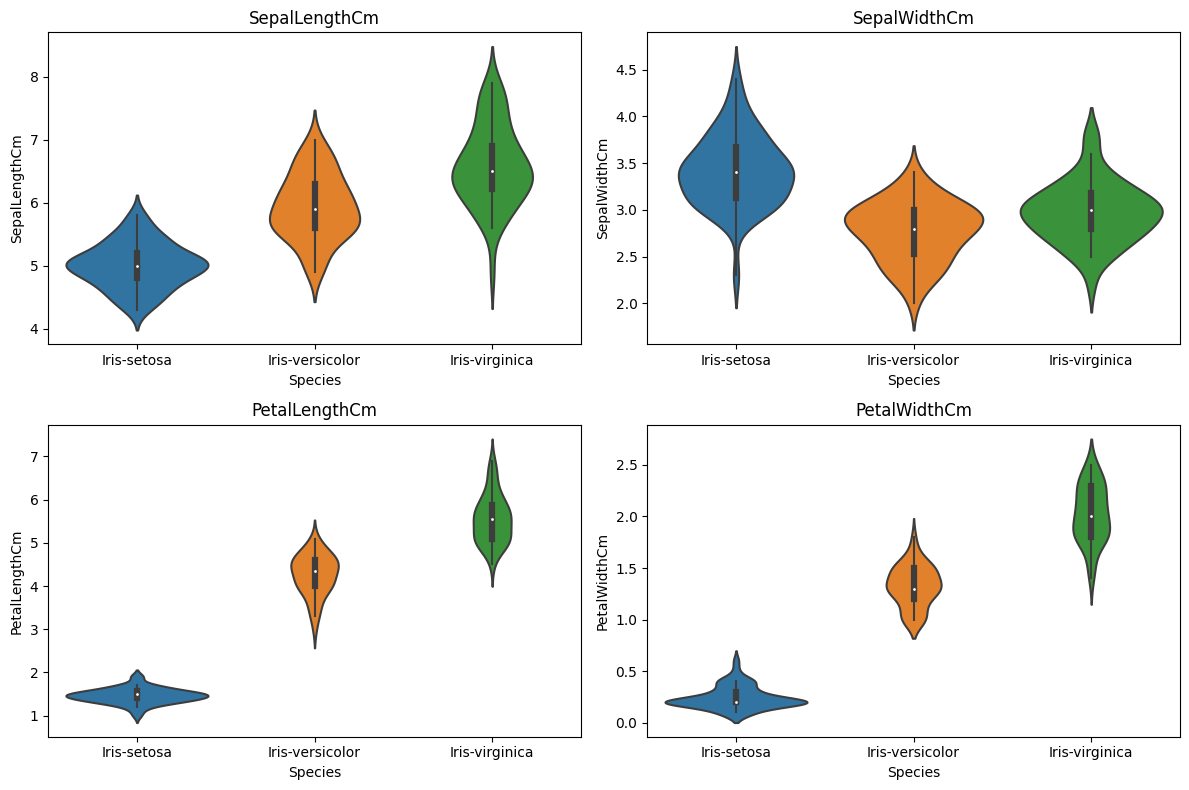

In [ ]:
plt.figure(figsize=(12, 8))
n_features = len(data.columns[:-1])
n_rows = n_features // 2 + n_features % 2
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(n_rows, 2, i+1)
    sns.violinplot(x='Species', y=feature, data=data)
    plt.title(feature)
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot(data ,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='Dark2')
plt.show()

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(12,6))
sns.stripplot(data ,ax=axes[0])
axes[0].set_title('Iris StripPlot')
sns.swarmplot(data ,ax=axes[1])
axes[1].set_title('Iris SwarmPlot')
plt.tight_layout()
plt.show()

In [ ]:
df = data.drop('Species',axis=1)
sns.heatmap(df.corr(),annot=True)

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(data)

In [ ]:
data.plot(kind='line')

In [ ]:
plt.figure(figsize=(12, 8))
n_features = len(data.columns[:-1])
n_rows = n_features // 2 + n_features % 2
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(n_rows, 2, i+1)
    sns.histplot(x=feature, data=data,kde=True)
    plt.title(feature)
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [ ]:
X = data.drop('Species',axis=1)
y= data['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    pred = KNN.predict(X_test)
    error_rate.append(np.mean(pred !=y_test))

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(1,40),error_rate,color='blue',markersize=10,markerfacecolor='red',linestyle='dashed',marker='o')

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=8,weights='uniform')
KNN.fit(X_train,y_train)

In [ ]:
KNN_prediction = KNN.predict(X_test)

In [ ]:
KNN_accuracy = accuracy_score(y_test,KNN_prediction)
KNN_accuracy

In [ ]:
KNN_conf = confusion_matrix(y_test,KNN_prediction)
sns.heatmap(KNN_conf,annot = True, cmap='inferno')

In [ ]:
Dtree = DecisionTreeClassifier(criterion='entropy')
Dtree.fit(X_train,y_train)

In [ ]:
Dtree_prediction = Dtree.predict(X_test)

In [ ]:
Dtree_accuracy = accuracy_score(y_test,Dtree_prediction)
Dtree_accuracy

In [ ]:
Dtree_conf = confusion_matrix(y_test,Dtree_prediction)
sns.heatmap(Dtree_conf,annot = True, cmap='magma')

In [ ]:
from sklearn import tree
fn =['sepal_length(cm)', 'sepal_width(cm)','petal_length(cm)','petal_width(cm)']
cn =['setosa','versicolor','virginica']
fig,axes = plt.subplots(nrows =1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(Dtree,
               feature_names=fn,
               class_names=cn,
               filled = True);

In [ ]:
Lreg = LogisticRegression(C=100,max_iter=100)
Lreg.fit(X_train,y_train)

In [ ]:
Lreg_prediction = Lreg.predict(X_test)

In [ ]:
Lreg_accuracy = accuracy_score(y_test,Lreg_prediction)
Lreg_accuracy

In [ ]:
sns.regplot(x=y_test,y=Lreg_prediction,logistic=True,ci=None)

In [ ]:
Lreg_conf = confusion_matrix(y_test,Lreg_prediction)
sns.heatmap(Lreg_conf,annot = True, cmap='viridis')

In [ ]:
CAT = CatBoostClassifier(learning_rate=0.001)
CAT.fit(X_train,y_train)

In [ ]:
CAT_prediction = CAT.predict(X_test)

In [ ]:
cat_accuracy = accuracy_score(y_test,CAT_prediction)
cat_accuracy

In [ ]:
LGM = LGBMClassifier()
LGM.fit(X_train,y_train)

In [ ]:
LGM_prediction = LGM.predict(X_test)

In [ ]:
lgm_accuracy = accuracy_score(y_test,LGM_prediction)
lgm_accuracy

In [ ]:
Z = np.arange(5)
Accuracies =[KNN_accuracy,Dtree_accuracy,Lreg_accuracy,cat_accuracy,lgm_accuracy]

In [ ]:
color = ['blue','red','green','gold','orange']
plt.figure(figsize=(10,5))
plt.bar(Z,Accuracies,color=color)
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.xticks(Z, [' KNN', 'DecisionTree ', 'LogisticRegression','Catboost','LightGBM'])
plt.show()